# Data Exploration with Descriptive Statistics and Visualizations

This exercise is for the data exploration and your task is to understand a data set based on the description, statistics, and from visualizations.

## Data for this exercise

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). The description of the data is provided together with the actual data and should be the starting point for your analysis of the data.

## Descriptive statistics of the boston data

Explore the boston data using descriptive statistics. Calculate the central tendency with the mean and median, the variability through the standard deviation and the IQR, as well as the range of the data. The real task is understanding something about the data from these results. For example, what can you learn about the CRIM feature from the mean and the median?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)

df = boston.frame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
desc = df.describe()
desc

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# stats
mean_values = df_numeric.mean()
median_values = df_numeric.median()
std_dev = df_numeric.std()

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

data_range = df_numeric.max() - df_numeric.min()

# combine into df
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Dev': std_dev,
    'IQR': IQR,
    'Range': data_range
})

# round results
summary_stats.round(2)


,Mean,Median,Std Dev,IQR,Range
CRIM,3.61,0.26,8.60,3.60,88.97
ZN,11.36,0.00,23.32,12.50,100.00
INDUS,11.14,9.69,6.86,12.91,27.28
NOX,0.55,0.54,0.12,0.18,0.49
RM,6.28,6.21,0.70,0.74,5.22
AGE,68.57,77.50,28.15,49.05,97.10
DIS,3.80,3.21,2.11,3.09,11.00
TAX,408.24,330.00,168.54,387.00,524.00
PTRATIO,18.46,19.05,2.16,2.80,9.40
B,356.67,391.44,91.29,20.85,396.58


The average crime rate is 3.61, but the median is only 0.26, so most towns have low crime. A few towns have really high crime, which makes the average look bigger than it really is. This can mean that the data is skewed by outliers.

## Visualizations

The Python library ```matplotlib``` is great for creating all kinds of visualizations. There are even libraries on top of ```matplotlib``` that facilitate relatively complex visualizations in a single line of code like ```seaborn```.


### Analyze single features of the boston data

Visually analyze features ```zn``` and ```indus``` of the boston data. Use the techniques described in Chapter 3, i.e., histograms and density plots (with/without rugs). What can you learn about these features from these plots? What are the advantages and drawbacks of the different plots for this data?

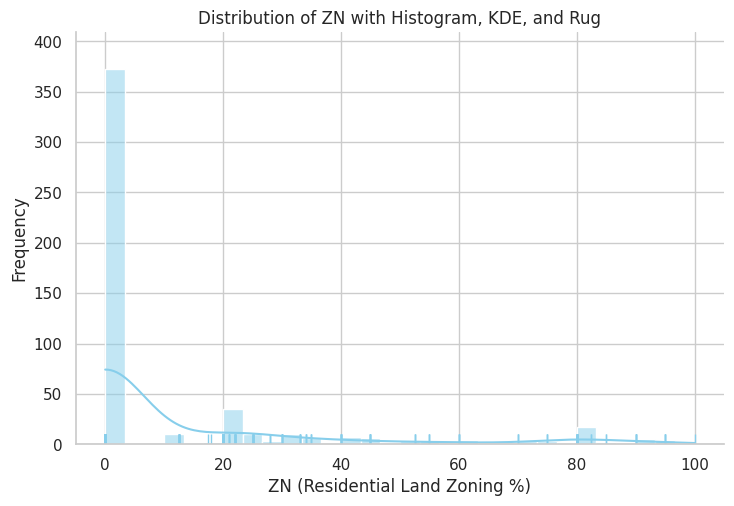

In [12]:
sns.set(style="whitegrid")

# ZN
sns.displot(data=df, x="ZN", kind="hist", kde=True, rug=True, bins=30, color='skyblue', height=5, aspect=1.5)
plt.title("Distribution of ZN with Histogram, KDE, and Rug")
plt.xlabel("ZN (Residential Land Zoning %)")
plt.ylabel("Frequency")
plt.show()


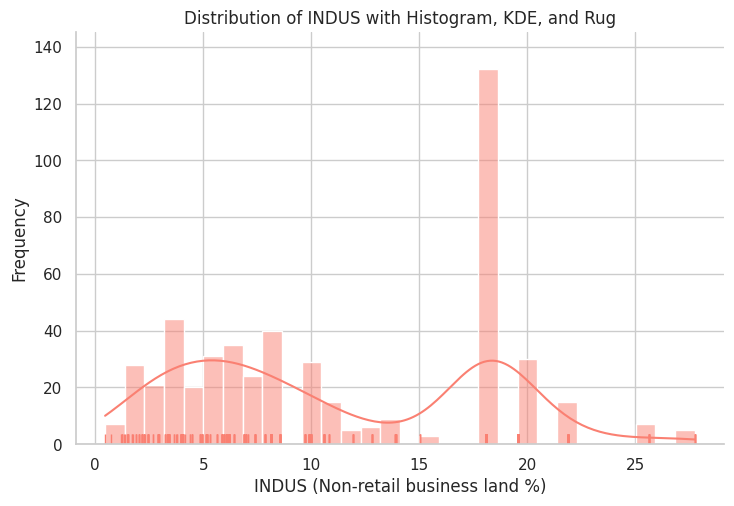

In [13]:
sns.displot(data=df, x="INDUS", kind="hist", kde=True, rug=True, bins=30, color='salmon', height=5, aspect=1.5)
plt.title("Distribution of INDUS with Histogram, KDE, and Rug")
plt.xlabel("INDUS (Non-retail business land %)")
plt.ylabel("Frequency")
plt.show()


From the plots, we can see that most towns have a ZN value of zero, meaning they don’t have big residential zones, and only a few towns have high values. The INDUS values are more spread out, showing that some towns have more industrial land than others. Histograms are good for showing how often values happen, KDE plots help us see the overall shape of the data, and rug plots show where each data point is. But histograms can be tricky if the bins are too big or small, KDE plots can hide details, and rug plots get messy if there’s too much data.

### Analyze the pair-wise relationships between the features of the boston data

Next, analyze the pair-wise relationships between all fourteen features of the boston data. First, analyze their relationship through scatter plots. Then, create a heatmap of the correlations between the features. What did you learn about the data?

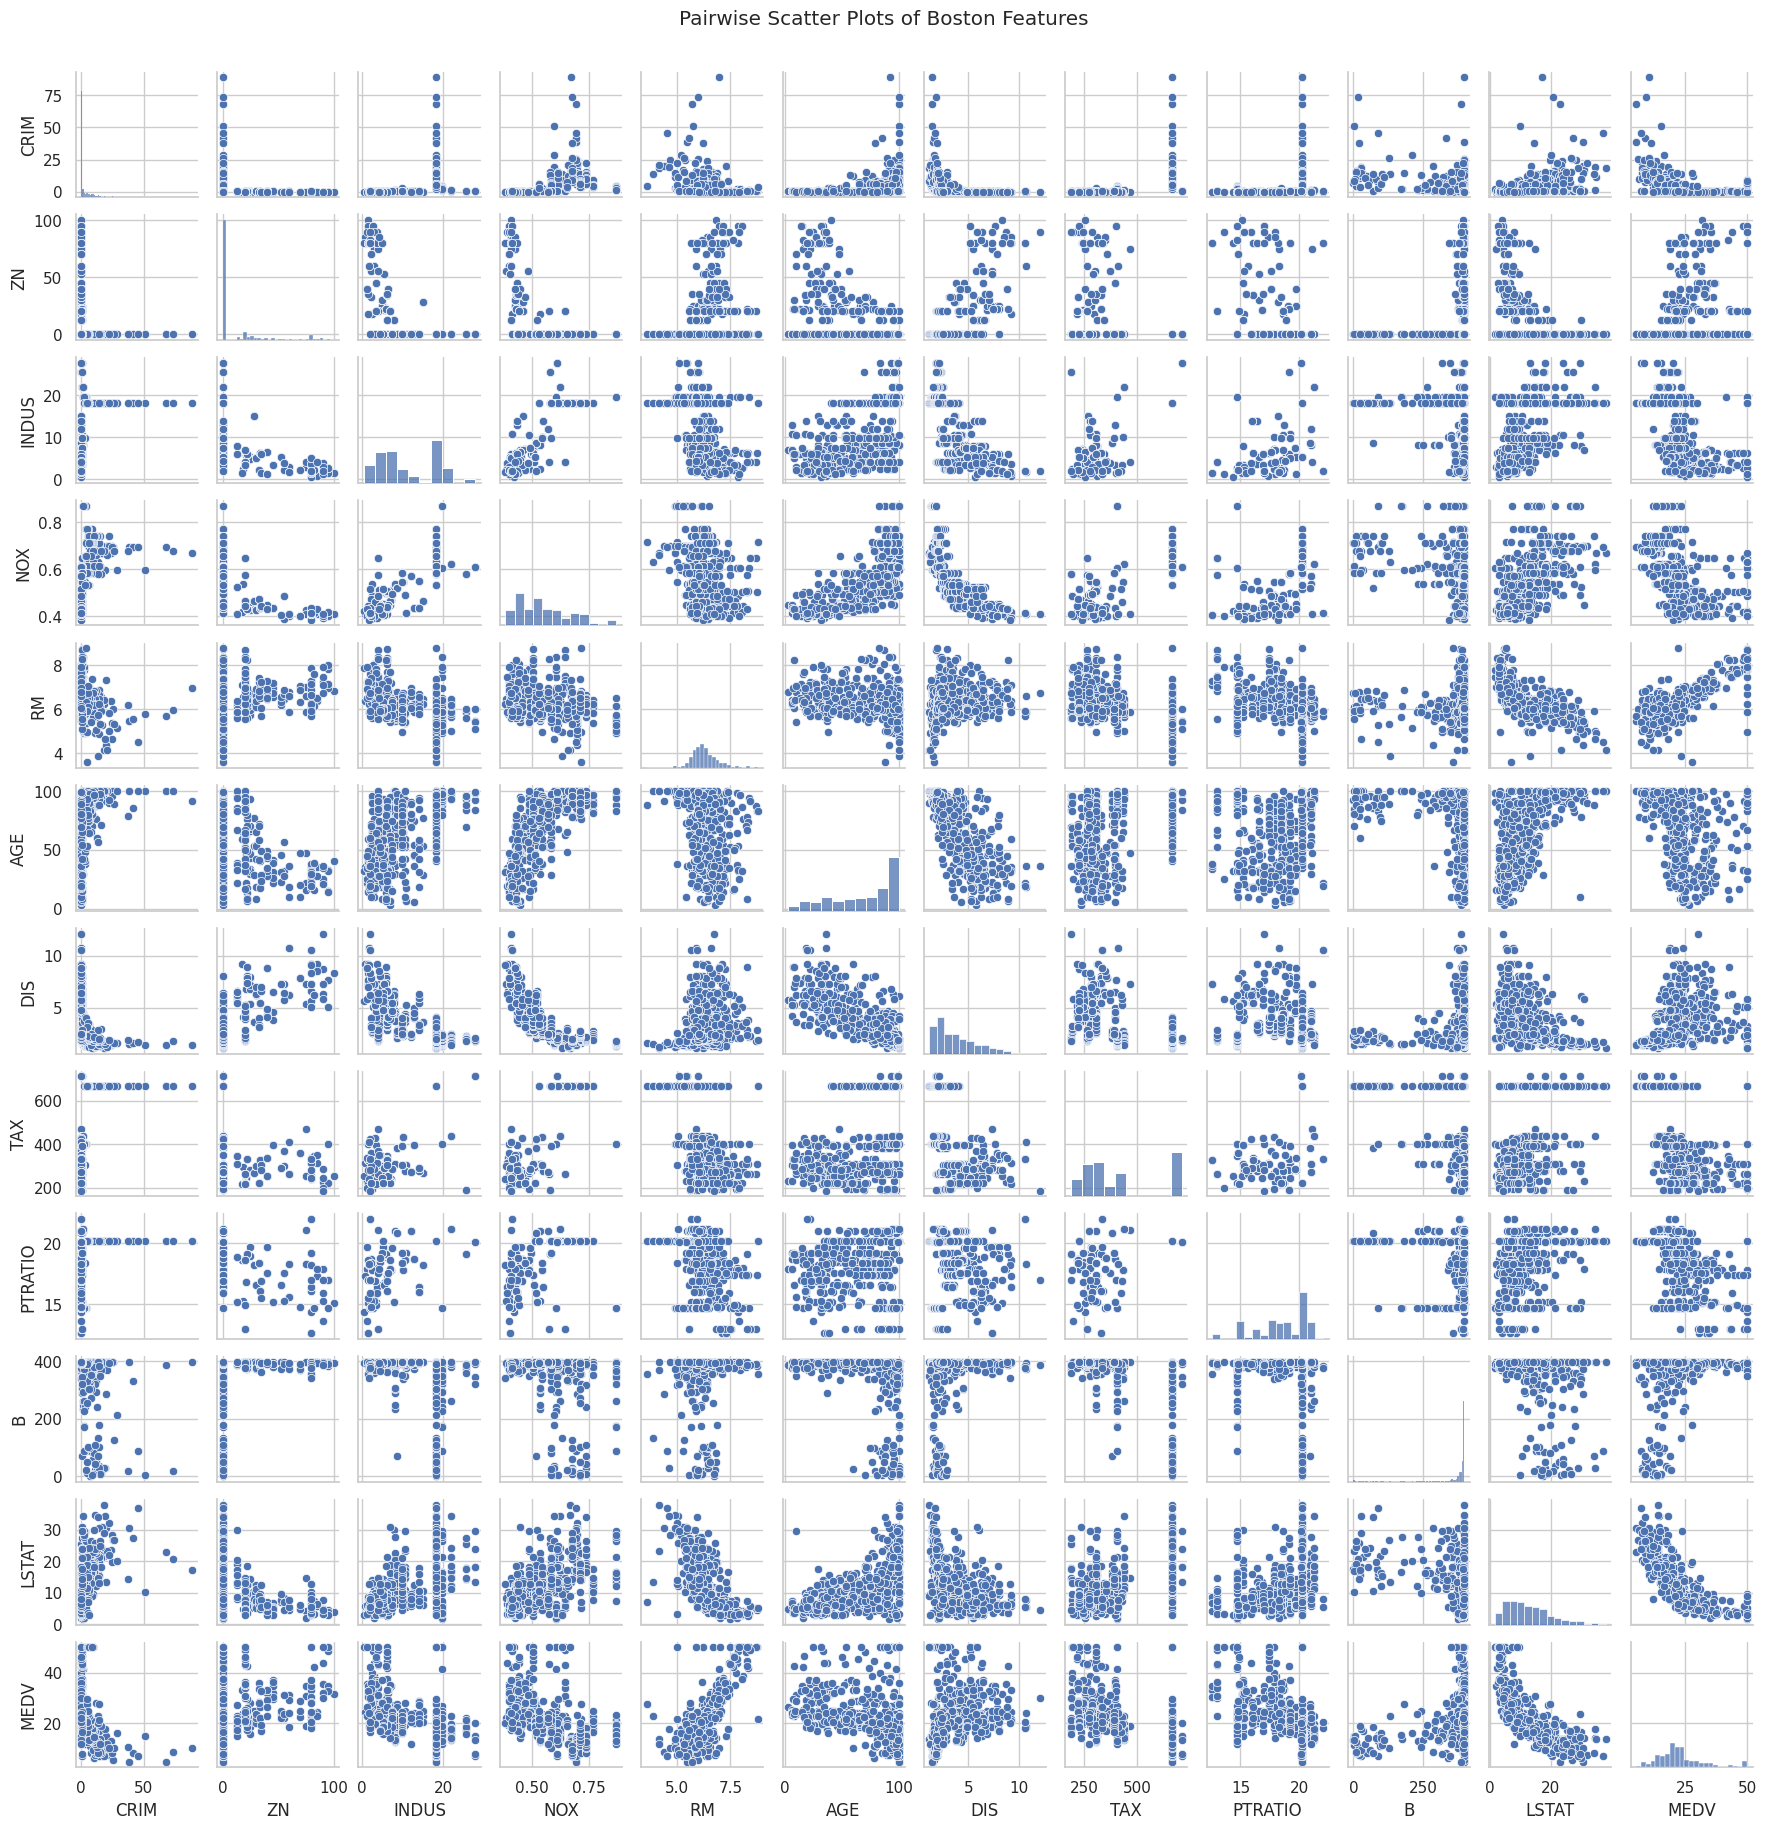

In [14]:
df_numeric = df.select_dtypes(include=[np.number])

sns.pairplot(df_numeric, height=1.5)
plt.suptitle("Pairwise Scatter Plots of Boston Features", y=1.02)
plt.show()

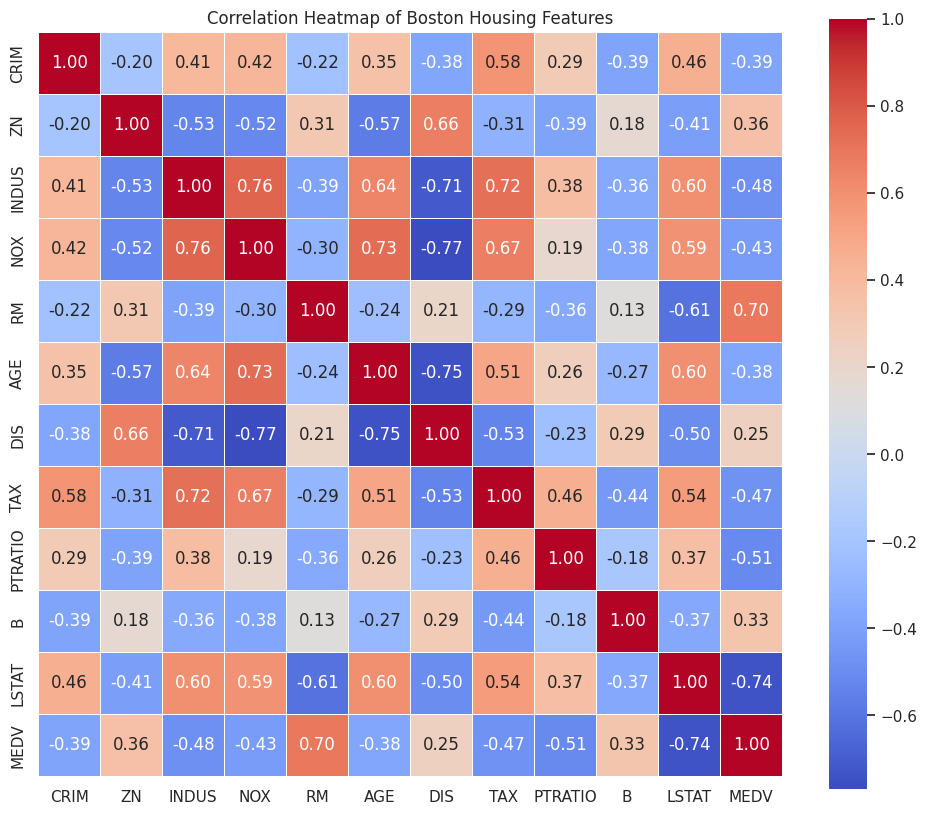

In [15]:
plt.figure(figsize=(12, 10))
corr = df_numeric.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Boston Housing Features")
plt.show()

From the scatter plots and heatmap, I saw that some features are closely related. For example, houses with more rooms usually cost more, and places with more lower-status people tend to have cheaper houses. Some features don’t really affect each other. The plots also showed me some unusual points and patterns. This helps to know which features matter most when looking at house prices.